**Libraries needed**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

***1.Data Cleaning and Preprocessing***


**1.1 Data Cleaning**

It involves identifying and handling errors, inconsistencies, and missing information to ensure the dataset is reliable.

Checking Data Structure: It's important to understand the dataset by examining the data types, structure, and number of entries in each column.

The .info() method provides insights into the data types and whether any columns have missing or incorrect data.

Checking for Missing Values: Missing data can affect the accuracy of models. We check for missing values in each column using .isnull().sum(). This step helps identify where data is incomplete, so it can be handled appropriately.

Checking for Duplicate Values: Duplicate records can distort the analysis, leading to biased results. The .duplicated().sum() method helps find any duplicate rows, which can then be removed if necessary.

Handling NaN Values: Columns with missing data (NaN values) need to be addressed. If a feature has a lot of missing data, it might be excluded, or the missing values can be imputed or replaced using statistical techniques such as mean, median, or mode, depending on the context.

In [2]:
# Load the dataset

df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

# Display the first few rows
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
# Check for missing values
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [5]:
# Check for duplicate values
df.duplicated().sum()

0

In [6]:
# Check for any NaN values and data types
print(df.dtypes)
# Checking if any column has NaN values
df.isna().any()

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object


,0
day,False
month,False
year,False
Temperature,False
RH,False
Ws,False
Rain,False
FFMC,False
DMC,False
DC,False


**1.2 Data Preprocessing**

Data preprocessing transforms raw data into a suitable format for analysis or modeling.

Removing Irrelevant Features: The 'Region' column is removed because it does not provide any meaningful insight for the analysis. Including irrelevant features can introduce noise and reduce model performance.

Checking Unique Values in 'Classes': The 'Classes' column, which indicates whether there was a fire, is analyzed for unique values to ensure consistency. Any inconsistent or misspelled values are identified for correction.

Cleaning Up Extra Spaces: Extra spaces in categorical columns like 'Classes' can cause issues when encoding or analyzing data. These are removed using string manipulation functions to ensure that all entries are uniform.

Encoding the 'Classes' Feature: If necessary, the categorical 'Classes' feature is encoded into numerical values (e.g., 'fire' as 1 and 'no fire' as 0). This is crucial when preparing the data for machine learning models, which typically require numerical input.

Standardization: To ensure all features are on the same scale, numerical data is standardized. Standardization transforms features to have a mean of 0 and a standard deviation of 1, which helps improve model performance.

Correlation Matrix: A correlation matrix is computed to visualize the relationship between different features and the target variable, 'FWI' (Fire Weather Index). Features with low correlation to 'FWI' might be candidates for elimination to reduce model complexity.

Eliminating Unnecessary Columns: Columns like 'day', 'month', 'year', 'Ws' (Wind Speed), and 'Rain' are dropped, as they are not expected to provide useful insights for the analysis.

Visualizing Feature Relationships with 'FWI': Scatter plots are created for each feature against 'FWI' to visually assess potential relationships. Features that show strong patterns or trends may be more relevant for predictive modeling.

In [7]:
# Drop the 'Region' column as it's not useful for the analysis
df = df.drop(columns=['Region'])

In [8]:
# Check the unique values in the 'Classes' feature
print(df['Classes'].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [9]:
# Clean up any extra spaces in the 'Classes' column
df['Classes'] = df['Classes'].str.strip()

In [10]:
# Check the unique values in the 'Classes' feature
print(df['Classes'].unique())

['not fire' 'fire']


In [11]:
# Encode the 'Classes' feature (if necessary)
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [12]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0


In [13]:
# Standardization For numerical columns that will be used in modeling:

# Select numerical columns (exclude 'Classes' and non-numeric columns)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize the data
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

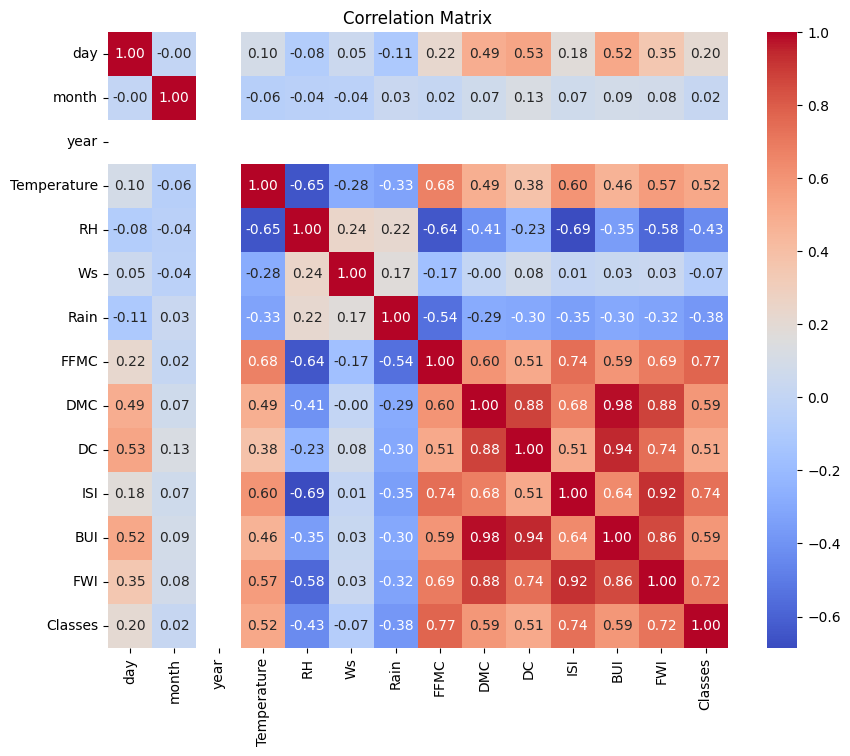

Correlation of each feature with FWI
FWI            1.000000
ISI            0.922895
DMC            0.875864
BUI            0.857973
DC             0.739521
Classes        0.719216
FFMC           0.691132
Temperature    0.566670
day            0.350781
month          0.082639
Ws             0.032368
Rain          -0.324422
RH            -0.580957
year                NaN
Name: FWI, dtype: float64


In [14]:
# Create a correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print('Correlation of each feature with FWI')

# Display the correlation of features with 'FWI'
print(corr_matrix['FWI'].sort_values(ascending=False))

**Confusion Matrix Insights:**

1. Strong Positive Correlations with FWI:

ISI (Initial Spread Index): Correlation of 0.92. ISI shows a very strong positive relationship with FWI. This suggests that ISI is an important feature for predicting FWI, as it likely influences how quickly a fire can spread.

DMC (Duff Moisture Code): Correlation of 0.88. DMC also has a strong positive correlation with FWI. This means that drier forest fuel, as indicated by DMC, tends to lead to higher fire weather indices.

BUI (Build-Up Index): Correlation of 0.86. BUI measures the overall amount of fuel available for combustion, so its strong relationship with FWI is expected, indicating that the more fuel available, the higher the FWI.

DC (Drought Code): Correlation of 0.74. DC, which indicates long-term drying conditions, also shows a strong positive correlation with FWI, meaning that prolonged drought contributes to an increased fire risk.

Classes (fire/no fire): Correlation of 0.72. This feature seems to be highly correlated with FWI, meaning that the class of the day (whether there was a fire or not) is closely linked to FWI values. This suggests that higher FWI values are associated with days where fire incidents occurred.

FFMC (Fine Fuel Moisture Code): Correlation of 0.69. A moderately strong correlation with FWI, showing that finer fuels (like grass and leaves) that dry quickly also influence the FWI. When FFMC is high, it likely leads to higher fire risks.

2. Moderate Positive Correlation:

Temperature: Correlation of 0.57. Temperature is moderately positively correlated with FWI, indicating that hotter conditions contribute to higher fire risk. However, this relationship isn't as strong as some of the fuel-related variables, likely because other factors also play a role in fire risk.

3. Weak Correlations:

Day: Correlation of 0.35. The day of the month shows a weak correlation with FWI, implying that time alone (without considering other weather or fuel conditions) does not significantly influence fire risk.

Month: Correlation of 0.08. The month has almost no correlation with FWI, suggesting that the overall fire risk does not strongly depend on the calendar month. This might mean that other factors like daily weather conditions are more relevant than the time of year.

4. Near Zero Correlation:

Ws (Wind Speed): Correlation of 0.03. Wind speed has a very weak correlation with FWI. This is surprising, as wind is usually a factor in fire spread, but it could be that the influence of wind is already captured in other variables, such as ISI.

5. Negative Correlations:

Rain: Correlation of -0.32. As expected, rain has a negative correlation with FWI. When rain increases, the fire risk decreases, but this relationship is not very strong. The effect of rain may depend on how much rainfall occurs and its interaction with other environmental factors.

RH (Relative Humidity): Correlation of -0.58. Relative humidity shows a moderately strong negative correlation with FWI. Higher humidity levels usually lead to lower fire risk, as moisture in the air slows the drying process of fuel.

6. NaN Value:

Year: Correlation is NaN, which indicates that the year variable either doesn't vary (e.g., if only one year of data is present) or is not useful for predicting FWI. It can likely be dropped without affecting the analysis.

Key Takeaways:

ISI, DMC, BUI, and DC are the most important features to focus on for predicting FWI, as they show the strongest positive correlations.

Classes (fire/no fire) is also highly correlated with FWI, indicating that higher FWI values often coincide with fire incidents.
Rain and RH negatively impact FWI, with higher rain and humidity decreasing fire risk.

Wind speed and calendar-related features (day, month, year) appear to have little influence on FWI and may be less important for predictive models.

In [15]:
# Drop the unnecessary columns
df = df.drop(columns=['day', 'month', 'year', 'Ws', 'Rain'])

**Unnecessary columns dropped:**

1. 'day', 'month', and 'year' eliminated, as they don't offer meaningful contributions to FWI prediction.

2. 'Ws' (Wind Speed) removed due to its near-zero correlation with FWI.

3. 'Rain' has a moderate negative correlation with FWI and it will be eliminate for simplicity.

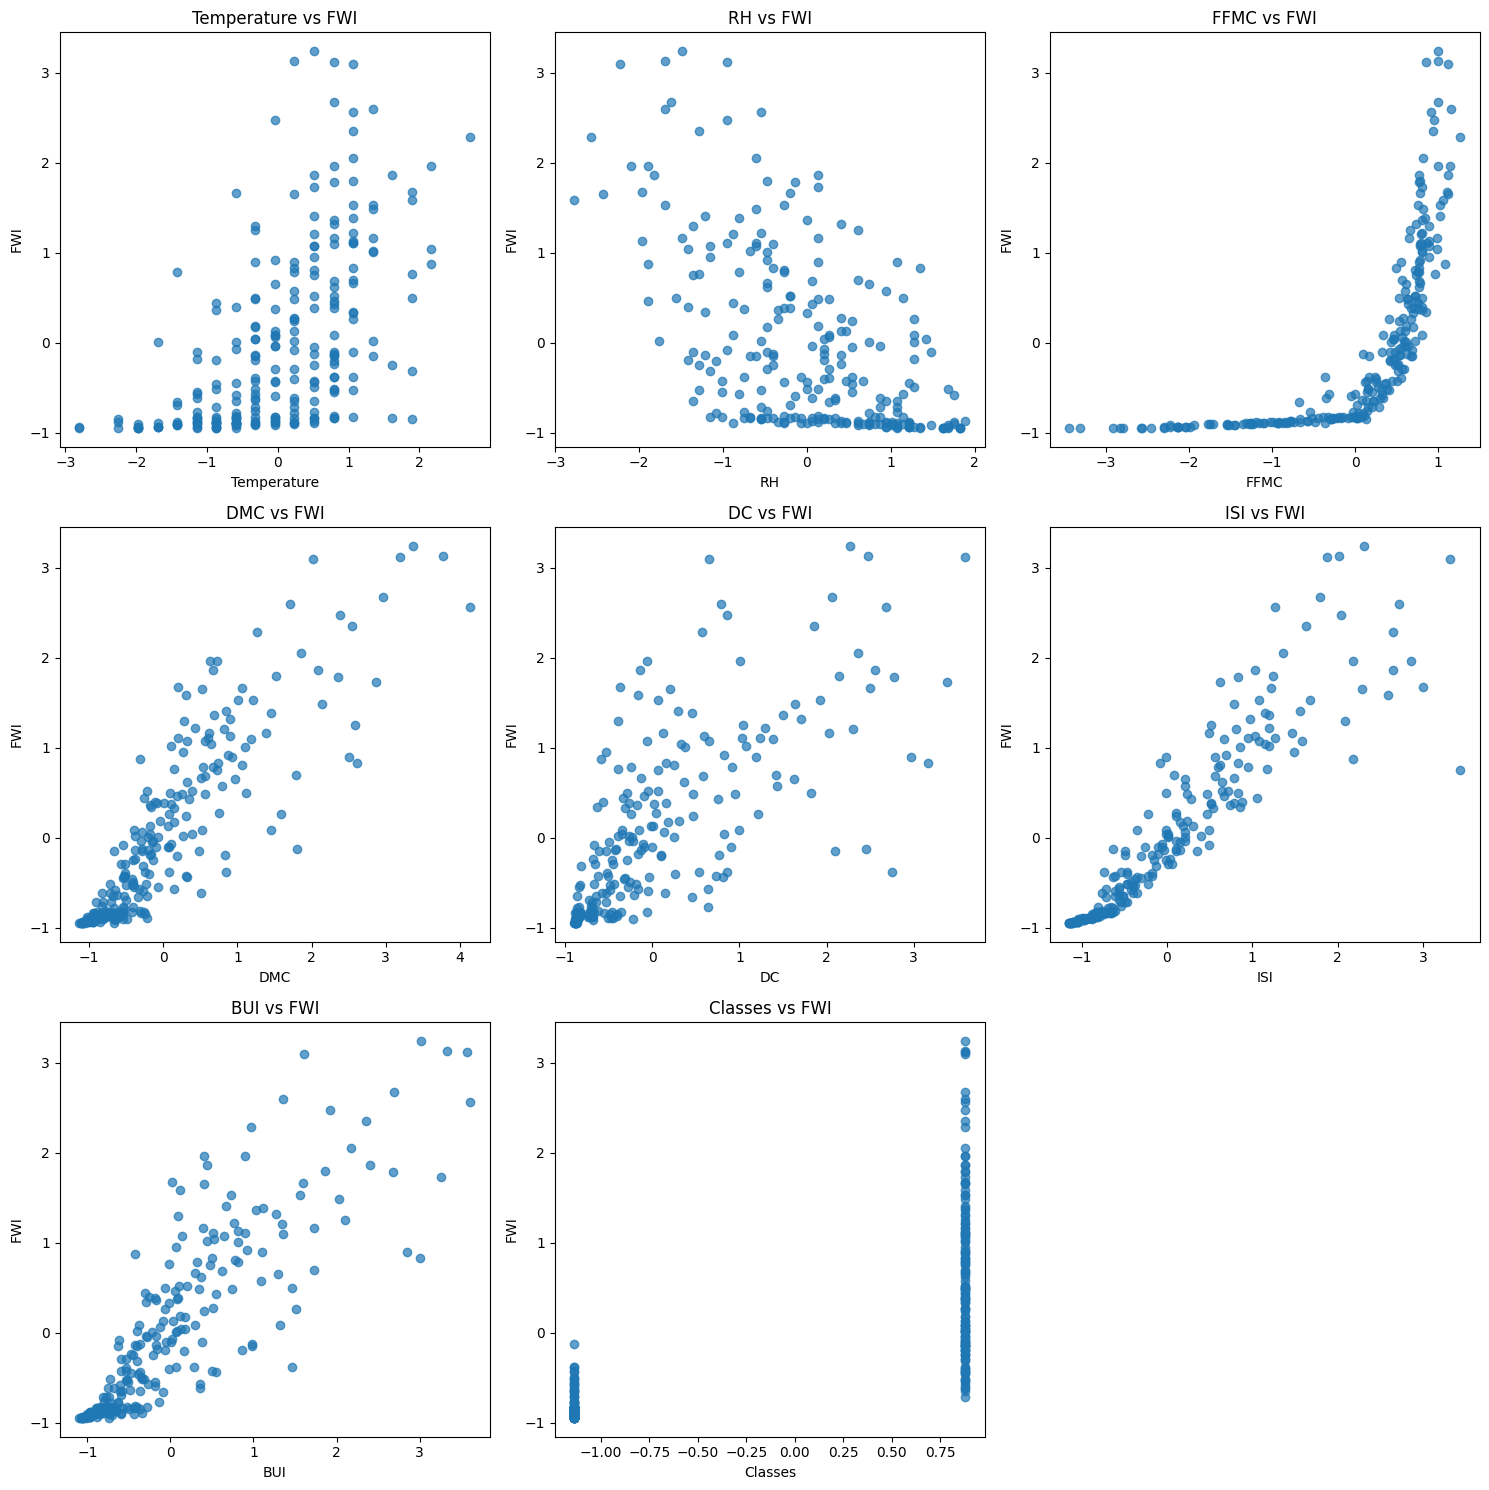

In [16]:
# List of features to plot against FWI (excluding 'FWI' itself)
features_to_plot = [col for col in df.columns if col != 'FWI']

# Determine the number of features
num_features = len(features_to_plot)

# Set up the number of rows and columns for the subplots
cols = 3  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate the number of rows required

# Create a figure and a set of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features_to_plot):
    axes[i].scatter(df[feature], df['FWI'], alpha=0.7)
    axes[i].set_title(f'{feature} vs FWI')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('FWI')

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [17]:
# Example of calculating Pearson correlation
correlation_results = {}
for feature in features_to_plot:
    correlation_results[feature] = df[feature].corr(df['FWI'])

# Print results
print(correlation_results)

{'Temperature': 0.5666698781162365, 'RH': -0.5809567466893126, 'FFMC': 0.6911319706859319, 'DMC': 0.8758641588191535, 'DC': 0.7395205557052652, 'ISI': 0.922894934315785, 'BUI': 0.857973095896425, 'Classes': 0.7192161486674176}


In [18]:
# Linear Regression Analysis

regression_results = {}
for feature in features_to_plot:
    X = df[[feature]]
    y = df['FWI']
    model = LinearRegression()
    model.fit(X, y)
    regression_results[feature] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r_squared': model.score(X, y)
    }

# Print results
print(regression_results)

{'Temperature': {'coefficient': 0.5666698781162368, 'intercept': 2.7632456957502514e-16, 'r_squared': 0.32111475076427065}, 'RH': {'coefficient': -0.5809567466893123, 'intercept': -1.4620220900413584e-16, 'r_squared': 0.33751074152382976}, 'FFMC': {'coefficient': 0.6911319706859311, 'intercept': -9.242488693771547e-16, 'r_squared': 0.4776634009042191}, 'DMC': {'coefficient': 0.8758641588191538, 'intercept': 2.026704824484658e-17, 'r_squared': 0.767138024703983}, 'DC': {'coefficient': 0.7395205557052652, 'intercept': -2.0566795537057759e-16, 'r_squared': 0.5468906523106241}, 'ISI': {'coefficient': 0.9228949343157853, 'intercept': 1.5712924686697732e-17, 'r_squared': 0.8517350597857374}, 'BUI': {'coefficient': 0.8579730958964247, 'intercept': -7.721154996673983e-17, 'r_squared': 0.7361178332820962}, 'Classes': {'coefficient': 0.719216148667415, 'intercept': -1.7774750591012276e-16, 'r_squared': 0.5172718685039894}}


In [19]:
# Summary statistics

summary_statistics = {}
for feature in features_to_plot:
    summary_statistics[feature] = {
        'feature_mean': df[feature].mean(),
        'FWI_mean': df['FWI'].mean(),
        'feature_std': df[feature].std(),
        'FWI_std': df['FWI'].std()
    }

# Print results
print(summary_statistics)

{'Temperature': {'feature_mean': -7.456312659210927e-16, 'FWI_mean': -1.4620220900413584e-16, 'feature_std': 1.002063985684027, 'FWI_std': 1.0020639856840272}, 'RH': {'feature_mean': 0.0, 'FWI_mean': -1.4620220900413584e-16, 'feature_std': 1.0020639856840272, 'FWI_std': 1.0020639856840272}, 'FFMC': {'feature_mean': 1.125757009331846e-15, 'FWI_mean': -1.4620220900413584e-16, 'feature_std': 1.0020639856840274, 'FWI_std': 1.0020639856840272}, 'DMC': {'feature_mean': -1.900628717053766e-16, 'FWI_mean': -1.4620220900413584e-16, 'feature_std': 1.002063985684027, 'FWI_std': 1.0020639856840272}, 'DC': {'feature_mean': 8.041121495227472e-17, 'FWI_mean': -1.4620220900413584e-16, 'feature_std': 1.0020639856840272, 'FWI_std': 1.0020639856840272}, 'ISI': {'feature_mean': -1.75442650804963e-16, 'FWI_mean': -1.4620220900413584e-16, 'feature_std': 1.0020639856840277, 'FWI_std': 1.0020639856840272}, 'BUI': {'feature_mean': -8.041121495227472e-17, 'FWI_mean': -1.4620220900413584e-16, 'feature_std': 1.00

In [20]:
# Calculate skewness and kurtosis

skewness = {}
kurtosis = {}
for feature in features_to_plot:
    skewness[feature] = df[feature].skew()
    kurtosis[feature] = df[feature].kurtosis()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: {'Temperature': -0.19132732849056466, 'RH': -0.24279045559117954, 'FFMC': -1.3201301160852994, 'DMC': 1.5229829314616827, 'DC': 1.4734602291852021, 'ISI': 1.1402425645672245, 'BUI': 1.4527448411320754, 'Classes': -0.25884647485126766}
Kurtosis: {'Temperature': -0.14141445760998161, 'RH': -0.5089428113634491, 'FFMC': 1.0400869924466756, 'DMC': 2.462550971040134, 'DC': 1.5964668453332855, 'ISI': 0.862325219957925, 'BUI': 1.9560166440829585, 'Classes': -1.9491091210302762}


**1. Correlation Coefficients**

Strong Positive Correlations:

ISI (0.9229): Very strong positive relationship with FWI. This indicates that as the ISI increases, FWI tends to increase significantly.

DMC (0.8759) and BUI (0.8580): Both features show a strong positive correlation with FWI. They are likely good predictors of fire weather conditions.

Moderate Positive Correlations:

Classes (0.7192): Indicates a strong relationship, suggesting that different classes significantly impact FWI.

DC (0.7395): Also shows a moderate positive correlation, indicating it can help predict FWI effectively.

Moderate Negative Correlation:

RH (-0.5809): Indicates that higher relative humidity is associated with lower FWI, which aligns with the idea that wetter conditions reduce fire risk.

**2. Linear Regression Results**

Interpretation of Coefficients:

The coefficients for features like ISI (0.9229), DMC (0.8759), and BUI (0.8580) suggest that these features significantly impact FWI. A unit increase in these features corresponds to a substantial increase in FWI.

RH (-0.5809) indicates that an increase in relative humidity leads to a decrease in FWI, reflecting the inverse relationship.

R-squared Values:

ISI (0.8517) and DMC (0.7671) have high R-squared values, indicating that these features explain a significant proportion of the variance in FWI.

FFMC (0.4777) and Classes (0.5173) have moderate R-squared values, suggesting they also have predictive power, but are less effective than ISI and DMC.

**3. Summary Statistics**

The means and standard deviations indicate that most features are centered around zero (especially relative humidity), suggesting normalization or standardization might be beneficial for further analysis.

**4. Skewness and Kurtosis**

Skewness:

Features like DMC, DC, ISI, and BUI exhibit positive skewness, indicating that these distributions are right-skewed (with a tail on the right). This suggests the presence of outliers on the higher end.
FFMC shows negative skewness, suggesting a left skew (more values on the higher end).

Kurtosis:

Features like DMC, DC, ISI, and BUI have positive kurtosis, suggesting that these distributions have heavier tails than a normal distribution, which could indicate the presence of outliers.

Classes has negative kurtosis, suggesting a flatter distribution with less extreme values.

**Summary**

Key Predictors: ISI, DMC, and BUI are the most influential predictors of FWI, while RH negatively impacts FWI.

**3. Model Development and Analysis**

The main focus on building this predictive model is to estimate the Fire Weather Index (FWI) based on the features available in the dataset. This involves selecting appropriate modeling techniques, implementing them, and evaluating their performance.

Preparing the Data


Feature Selection: Identify the features that will be used as inputs for the model, while the target variable remains the FWI.

Train-Test Split: The dataset is divided into training and testing sets, usually with an 80/20 split. The training set is used to train the models, while the testing set evaluates their performance on unseen data.

Standardization: To improve the convergence of the models, the features are standardized. This ensures that all features contribute equally to the model training by scaling them to a mean of 0 and a standard deviation of 1.

In [21]:
# Define features and target variable
X = df.drop(['FWI'], axis=1)  #'FWI' is the target variable
y = df['FWI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


3.2. Implementing Multiple Linear Regression

Multiple linear regression serves as the baseline model:

Model Creation: A linear regression model is instantiated and trained using the training set.

Prediction and Evaluation: Predictions are made on the test set, and performance is evaluated using metrics such as Mean Squared Error (MSE) and R-squared. MSE measures the average squared difference between predicted and actual values, while R-squared indicates the proportion of variance explained by the model.

In [22]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.005035473532575567
R-squared: 0.990839941653944


3.3. Implementing Regularization Techniques

To enhance model performance and prevent overfitting, regularization techniques are employed:

Lasso Regression: This technique adds a penalty term to the linear regression model to reduce the impact of less significant features. The strength of the penalty is controlled by the hyperparameter alpha.

Ridge Regression: Similar to Lasso, Ridge regression also applies a penalty, but it squares the coefficients, allowing for smaller, non-zero coefficients. This method helps maintain all features while reducing their influence.


3.3.1. Lasso Regression

In [23]:
# Create a Lasso model
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha for hyperparameter tuning

# Fit the model
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')


Lasso Mean Squared Error: 0.020243278697252894
Lasso R-squared: 0.9631753373773636


3.3.2. Ridge Regression

In [24]:
# Create a Ridge model
ridge_model = Ridge(alpha=0.1)  # You can adjust alpha for hyperparameter tuning

# Fit the model
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

Ridge Mean Squared Error: 0.0058498385923542685
Ridge R-squared: 0.9893585255737473


3.4. Cross-Validation and Hyperparameter Tuning

To ensure robust model performance, cross-validation and hyperparameter tuning are implemented:

Grid Search: This technique systematically searches for the best combination of hyperparameters for the chosen model (e.g., Lasso).

Cross-validation is employed to evaluate each combination on different subsets of the training data.

Model Evaluation: The best-performing model is selected based on evaluation metrics such as MSE and R-squared from the grid search.

In [25]:
# Define the model and parameters for tuning
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, parameters, cv=5)

# Fit the model
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best model
best_lasso_model = grid_search_lasso.best_estimator_

# Predict and evaluate the best Lasso model
y_pred_best_lasso = best_lasso_model.predict(X_test_scaled)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print(f'Best Lasso Mean Squared Error: {mse_best_lasso}')
print(f'Best Lasso R-squared: {r2_best_lasso}')

Best Lasso Mean Squared Error: 0.008423781138279135
Best Lasso R-squared: 0.9846762521495022


**Insights on Model Performance**

*Multiple Linear Regression:*

Mean Squared Error (MSE): 0.0050

R-squared: 0.9908

Interpretation: The multiple linear regression model has a very low MSE, indicating that the predictions are close to the actual FWI values. The R-squared value of 0.9908 suggests that approximately 99.08% of the variance in the FWI can be explained by the features included in the model. This indicates an excellent fit.

*Lasso Regression:*

Mean Squared Error (MSE): 0.0202

R-squared: 0.9632

Interpretation: The Lasso regression model has a higher MSE compared to the multiple linear regression model, which suggests that it may not be capturing the relationship as well as the linear regression. The R-squared value of 0.9632, while still high, indicates that about 96.32% of the variance in FWI is explained by the model. The penalty imposed by Lasso may have led to the exclusion of some features that could contribute to the predictive power.

*Ridge Regression:*

Mean Squared Error (MSE): 0.0058

R-squared: 0.9894

Interpretation: The Ridge regression model shows an MSE that is slightly higher than the multiple linear regression model but lower than the Lasso model. The R-squared value of 0.9894 suggests it explains 98.94% of the variance in the FWI. This indicates that Ridge may retain more features compared to Lasso, potentially providing a more balanced model performance.

*Best Lasso Regression:*

Mean Squared Error (MSE): 0.0084

R-squared: 0.9847

Interpretation: The best Lasso model improves upon the initial Lasso model but still shows a higher MSE compared to both linear regression and Ridge. The R-squared value of 0.9847 indicates that this model explains about 98.47% of the variance in FWI, which is still quite good but lower than both the multiple linear regression and Ridge regression models.

*Summary of Findings*

The multiple linear regression model outperforms both Lasso and Ridge in terms of predictive accuracy, as indicated by the lowest MSE and highest R-squared value.

Ridge regression performs slightly better than Lasso in terms of MSE, suggesting that it may be more effective in retaining useful features while preventing overfitting.

The Lasso regression models, including the best-performing one, have higher MSEs, indicating a trade-off in reducing feature complexity at the expense of predictive accuracy.

**Recommendations**

Given the strong performance of the multiple linear regression model, it might be the preferred choice for predicting FWI in this context.

**Step 4: Model Evaluation and Testing**

In this step, we focus on comprehensively evaluating the performance of the regression models developed in the previous step. The goal is to assess how well these models predict the Fire Weather Index (FWI) on unseen data and to ensure that the results are robust and reliable.

Model Performance Metrics:

Mean Squared Error (MSE): This metric quantifies the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance, as it reflects closer predictions to the actual outcomes.

R-squared (R²): This statistic provides an indication of the proportion of variance in the dependent variable (FWI) that is predictable from the independent variables. An R² value closer to 1 suggests a better fit, indicating that the model explains a high percentage of the variance.

Testing the Model on Unseen Data:

After training the models using the training dataset, it is crucial to evaluate their performance on a separate test dataset that was not used during the training phase. This ensures that the models can generalize well to new, unseen data.

By predicting FWI values on the test set and comparing these predictions to the actual FWI values, we can calculate the MSE and R² for each model, allowing us to gauge their effectiveness.

Comparison of Models:

All trained models (Linear Regression, Lasso Regression, Ridge Regression, and the best Lasso model) are compared based on their performance metrics. This comparison helps to identify the most effective model for predicting FWI, considering both accuracy and complexity.

Visualization of Results:

Visualizations such as scatter plots of actual versus predicted values provide a visual representation of model performance. These plots help to identify patterns, deviations, and potential outliers in the predictions, enhancing the understanding of model behavior.

Final Analysis and Insights:

The results from the performance metrics and visualizations are summarized, highlighting the strengths and weaknesses of each model. This analysis helps to inform decisions on which model to use for practical applications and guides future improvements in model development.

Overall, this step ensures that the models developed are not only theoretically sound but also practically effective in making accurate predictions for the Fire Weather Index.

In [26]:
# Evaluate Linear Regression Model
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Linear Regression R-squared: {r2_linear}')

# Evaluate Lasso Model
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')

# Evaluate Ridge Model
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

# Evaluate Best Lasso Model
y_pred_best_lasso = best_lasso_model.predict(X_test_scaled)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print(f'Best Lasso Mean Squared Error: {mse_best_lasso}')
print(f'Best Lasso R-squared: {r2_best_lasso}')

Linear Regression Mean Squared Error: 0.005035473532575567
Linear Regression R-squared: 0.990839941653944
Lasso Mean Squared Error: 0.020243278697252894
Lasso R-squared: 0.9631753373773636
Ridge Mean Squared Error: 0.0058498385923542685
Ridge R-squared: 0.9893585255737473
Best Lasso Mean Squared Error: 0.008423781138279135
Best Lasso R-squared: 0.9846762521495022


In [27]:
# Assuming 'df' is your cleaned DataFrame and 'FWI' is your target variable
# Define features and target variable
X = df.drop(columns=['FWI'])  # Adjust based on your features
y = df['FWI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict and evaluate the Linear Regression model
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Linear Regression R-squared: {r2_linear}')

# Create and fit a Lasso model
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha for hyperparameter tuning
lasso_model.fit(X_train_scaled, y_train)

# Predict and evaluate the Lasso model
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')

# Create and fit a Ridge model
ridge_model = Ridge(alpha=0.1)  # You can adjust alpha for hyperparameter tuning
ridge_model.fit(X_train_scaled, y_train)

# Predict and evaluate the Ridge model
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

# Define the model and parameters for Lasso tuning
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, parameters, cv=5)

# Fit the model for hyperparameter tuning
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best Lasso model
best_lasso_model = grid_search_lasso.best_estimator_

# Predict and evaluate the best Lasso model
y_pred_best_lasso = best_lasso_model.predict(X_test_scaled)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print(f'Best Lasso Mean Squared Error: {mse_best_lasso}')
print(f'Best Lasso R-squared: {r2_best_lasso}')

# Summary of results
results = {
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'Best Lasso'],
    'Mean Squared Error': [mse_linear, mse_lasso, mse_ridge, mse_best_lasso],
    'R-squared': [r2_linear, r2_lasso, r2_ridge, r2_best_lasso]
}

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

Linear Regression Mean Squared Error: 0.005035473532575567
Linear Regression R-squared: 0.990839941653944
Lasso Mean Squared Error: 0.020243278697252894
Lasso R-squared: 0.9631753373773636
Ridge Mean Squared Error: 0.0058498385923542685
Ridge R-squared: 0.9893585255737473
Best Lasso Mean Squared Error: 0.008423781138279135
Best Lasso R-squared: 0.9846762521495022

Model Performance Summary:
               Model  Mean Squared Error  R-squared
0  Linear Regression            0.005035   0.990840
1              Lasso            0.020243   0.963175
2              Ridge            0.005850   0.989359
3         Best Lasso            0.008424   0.984676


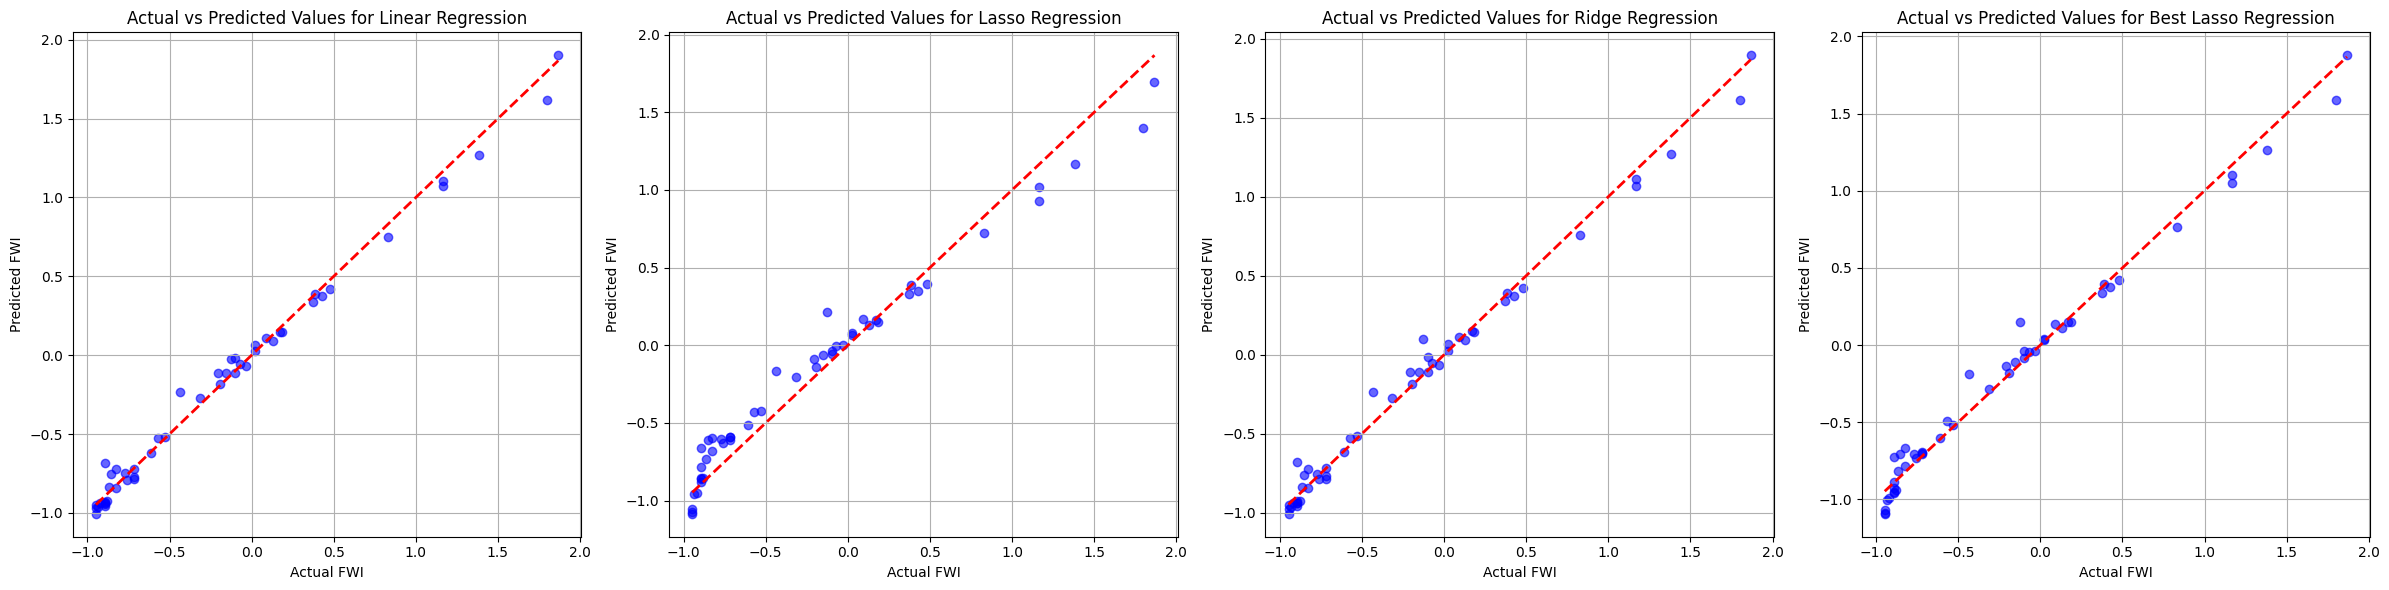

In [28]:
# Create a function to plot actual vs predicted values
def plot_actual_vs_predicted(ax, y_test, y_pred, model_name):
    ax.scatter(y_test, y_pred, color='blue', alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of equality
    ax.set_title(f'Actual vs Predicted Values for {model_name}')
    ax.set_xlabel('Actual FWI')
    ax.set_ylabel('Predicted FWI')
    ax.grid()

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # 1 row, 4 columns

# Plot for Linear Regression
plot_actual_vs_predicted(axes[0], y_test, y_pred, 'Linear Regression')

# Plot for Lasso
plot_actual_vs_predicted(axes[1], y_test, y_pred_lasso, 'Lasso Regression')

# Plot for Ridge
plot_actual_vs_predicted(axes[2], y_test, y_pred_ridge, 'Ridge Regression')

# Plot for Best Lasso Model
plot_actual_vs_predicted(axes[3], y_test, y_pred_best_lasso, 'Best Lasso Regression')

# Adjust layout
plt.tight_layout()
plt.show()


**Conclusion**

Model Selection: Among the models tested, the Linear Regression model emerged as the best performer in terms of both MSE and R-squared. This indicates that it provides the most accurate predictions of FWI based on the features selected.

Regularization Impact: The use of Lasso and Ridge regression introduces regularization, which is beneficial for preventing overfitting, especially in datasets with multicollinearity. However, in this instance, it appears that regularization may have negatively impacted the predictive power of the Lasso model, leading to a loss of valuable information from the dataset.

Feature Importance: The high R-squared values across the models suggest that the features included in the dataset are relevant for predicting FWI. Further analysis could involve exploring feature importance to identify which variables contribute most significantly to the predictions.

Overall, the analysis showcases a robust model performance, with the Linear Regression model being the most effective for predicting the Fire Weather Index.